Import the required packages with their customary aliases

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

4.	Using the pandas `read_csv()` method, read the GDP dataset into your notebook as a DataFrame called `gdp_df`. Take a look at the first few and last few rows to familiarize yourself with what is contained in this dataset.

In [6]:
gdp_df = pd.read_csv(r"C:\Users\foste\Documents\NSS\Python\projects\un-project-fosterwolff\data\gdp_percapita.csv")

5. How many rows and columns are in `gdp_df`? What are the data types of each column?

In [8]:
gdp_df.shape

(8219, 4)

In [10]:
gdp_df.dtypes

Country or Area     object
Year                 int64
Value              float64
Value Footnotes    float64
dtype: object

6. Drop the `Value Footnotes` column and rename the remaining three to 'Country', 'Year', and 'GDP_Per_Capita'.

In [14]:
gdp_df = gdp_df.drop(columns = ['Value Footnotes'])
gdp_df = gdp_df.rename(columns={'Country or Area':'Country', 'Value':'GDP_Per_Capita'})

8. In this question, you're going to create some plots to show the distribution of GDP per capita for the year 2020. Go to the Python Graph Gallery (https://www.python-graph-gallery.com/) and look at the different types of plots under the Distribution section. Create a histogram, a density plot, a boxplot, and a violin plot. What do you notice when you look at these plots? How do the plots compare and what information can you get out of one type that you can't necessarily get out of the others?

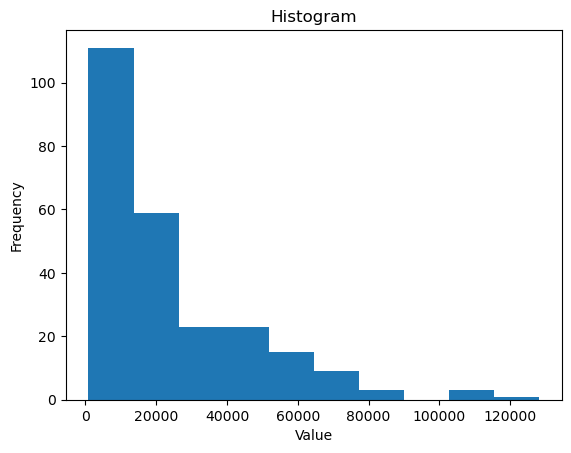

In [16]:
gdp_2020 = gdp_df[gdp_df['Year'] == 2020]
plt.hist(gdp_2020['GDP_Per_Capita'])
plt.title('Histogram')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

C:\Users\foste\AppData\Local\Temp\ipykernel_11416\3768091887.py:1: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(gdp_2020, fill=True)


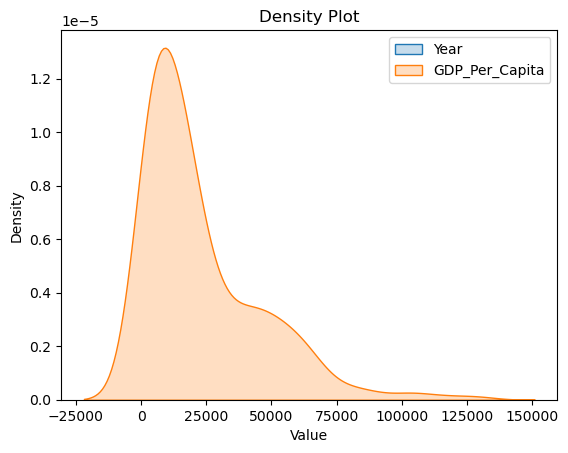

In [18]:
sns.kdeplot(gdp_2020, fill=True)
plt.title('Density Plot')
plt.xlabel('Value')
plt.show()

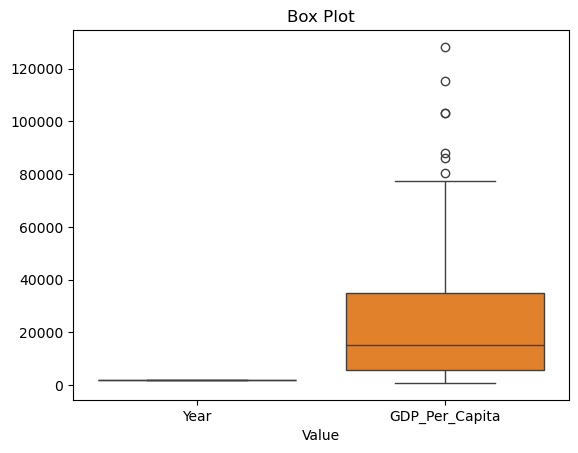

In [20]:
sns.boxplot(gdp_2020, fill=True)
plt.title('Box Plot')
plt.xlabel('Value')
plt.show()

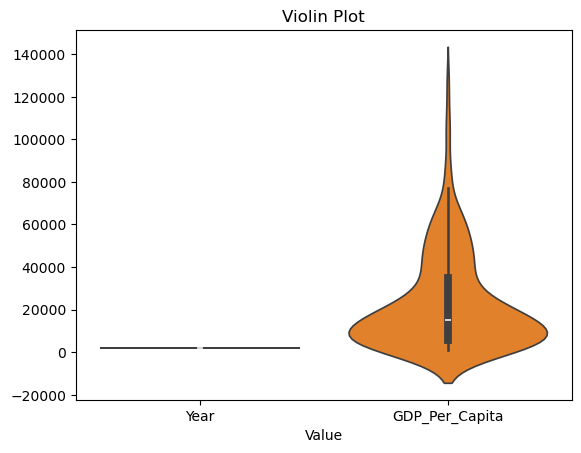

In [22]:
sns.violinplot(gdp_2020, fill=True)
plt.title('Violin Plot')
plt.xlabel('Value')
plt.show()

9. What was the median GDP per capita value in 2020?

In [28]:
median = gdp_2020['GDP_Per_Capita'].median()
median

15309.23598817024

10. For this question, you're going to create some visualizations to compare GDP per capita values for the years 1990, 2000, 2010, and 2020.

In [ ]:
gdp_decades = gdp_df[(gdp_df['Year'] == 1990) | (gdp_df['Year'] == 2000) | (gdp_df['Year'] == 2010) | (gdp_df['Year'] == 2020)]
gdp_decades

In [ ]:
sns.boxplot(x='Year',y='GDP_Per_Capita',data=gdp_decades)
plt.show()

In [ ]:
sns.barplot(x='Year',y='GDP_Per_Capita',data=gdp_decades)
plt.show()

In [ ]:
sns.scatterplot(x='Year',y='GDP_Per_Capita',data=gdp_decades)
plt.show()

In [ ]:
sns.regplot(x='Year',y='GDP_Per_Capita',data=gdp_decades)
plt.show()

In [ ]:
gdp_df

11. Which country was the first to have a GDP per capita greater than $100,000?

In [ ]:
high_gdp = gdp_df[gdp_df['GDP_Per_Capita'] > 100000]
high_gdp = high_gdp[high_gdp['Year'] == high_gdp['Year'].min()]
high_gdp

12. Which country had the highest GDP per capita in 2020? Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset.

In [ ]:
highest_gdp_country = gdp_2020['Country'][gdp_2020['GDP_Per_Capita'] == gdp_2020['GDP_Per_Capita'].max()].iloc[0]
highest_gdp_country

In [ ]:
highest_gdp_country_data = gdp_df[gdp_df['Country'] == highest_gdp_country]
highest_gdp_country_data

In [ ]:
sns.lineplot(x='Year', y='GDP_Per_Capita', data=highest_gdp_country_data, marker='o', color='darkgreen')
plt.title(f'GDP Per Capita Over Time: {highest_gdp_country}')
plt.xlabel('Year')
plt.ylabel('GDP Per Capita')
plt.show()

13. Which country had the lowest GDP per capita in 2020? Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset. **Bonus question:** Is it true in general that coutries had a higher GDP per capita in 2020 than in 1990? Which countries had lower GDP per capita in 2020 than in 1990?

In [ ]:
lowest_gdp_country = gdp_2020['Country'][gdp_2020['GDP_Per_Capita'] == gdp_2020['GDP_Per_Capita'].min()].iloc[0]
lowest_gdp_country_data = gdp_df[gdp_df['Country'] == lowest_gdp_country]

In [ ]:
sns.lineplot(x='Year', y='GDP_Per_Capita', data=lowest_gdp_country_data, marker='o', color='darkred')
plt.title(f'GDP Per Capita Over Time: {lowest_gdp_country}')
plt.xlabel('Year')
plt.ylabel('GDP Per Capita')
plt.show()

14. Read in the internet use dataset into a DataFrame named `internet_df`. You will likely get errors when doing this. Check the arguments for the read_csv function to find ones that can help correct the errors (https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) Once you are able to read it in, take per a look at the top and bottom few rows to make sure that it has been read in correctly. Also, check the datatypes of the columns.

In [53]:
internet_df = pd.read_csv(r"C:\Users\foste\Documents\NSS\Python\projects\un-project-fosterwolff\data\internet_use.csv", on_bad_lines='skip')
internet_df = internet_df.dropna(subset=['Value'])

15. Drop the `Value Footnotes` column and rename the remaining three to 'Country', 'Year', and 'Internet_Users_Pct'.

In [55]:
internet_df = internet_df.drop(columns = ['Value Footnotes'])

In [57]:
internet_df = internet_df.rename(columns = {'Country or Area':'Country','Value':'Internet_Users_Pct'})

In [59]:
internet_df['Year'] = internet_df['Year'].astype(int)

17. What is the first year to have a non-zero internet users percentage value?

In [ ]:
first_internet = internet_df[internet_df['Internet_Users_Pct'] > 0]['Year'].min()
first_internet

18. How does the distribution of internet users percent differ for 2000 and 2014?

In [ ]:
internet_2000_avg = internet_df['Internet_Users_Pct'][internet_df['Year'] == '2000'].mean()
internet_2014_avg = internet_df['Internet_Users_Pct'][internet_df['Year'] == '2014'].mean()
print(internet_2000_avg, internet_2014_avg)

19. For how many countries was the percentage of internet users below 5% in 2014?

In [ ]:
internet_below_five = internet_df[(internet_df['Year'] == '2014') & (internet_df['Internet_Users_Pct'] < 5)]
internet_below_five.shape

20. Merge the two DataFrames to one. Do this in a way that keeps **all rows** from each of the two DataFrames. Call the new DataFrame `gdp_and_internet_use`. Look at the first and last few rows to confirm that it merged correctly.

In [61]:
gdp_and_internet_use = pd.merge(gdp_df, internet_df, on=['Country','Year'], how='inner')

In [71]:
gdp_and_internet_use = gdp_and_internet_use.drop(columns = ['Value Footnotes'])

In [73]:
gdp_and_internet_use

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
0,Afghanistan,2019,2927.245144,17.600000
1,Afghanistan,2018,2902.392113,16.800000
2,Afghanistan,2017,2952.998916,13.500000
3,Afghanistan,2016,2958.785399,11.000000
4,Afghanistan,2015,2967.692067,8.260000
...,...,...,...,...
4798,Zimbabwe,1997,4304.406272,0.033080
4799,Zimbabwe,1996,4271.479930,0.016790
4800,Zimbabwe,1995,3935.280057,0.007684
4801,Zimbabwe,1994,3965.730986,0.001739


21. Find the three countries with the highest internet users percentage in 2014.

In [75]:
highest_2014 = gdp_and_internet_use[gdp_and_internet_use['Year'] == 2014]

In [89]:
highest_2014 = highest_2014.sort_values('Internet_Users_Pct', ascending = False)

In [107]:
three_highest = highest_2014.head(3)['Country']
three_highest

1992    Iceland
540     Bermuda
3268     Norway
Name: Country, dtype: object

In [112]:
all_years_three_highest = gdp_and_internet_use[gdp_and_internet_use['Country'].isin(three_highest)]

all_years_three_highest Use a seaborn FacetGrid

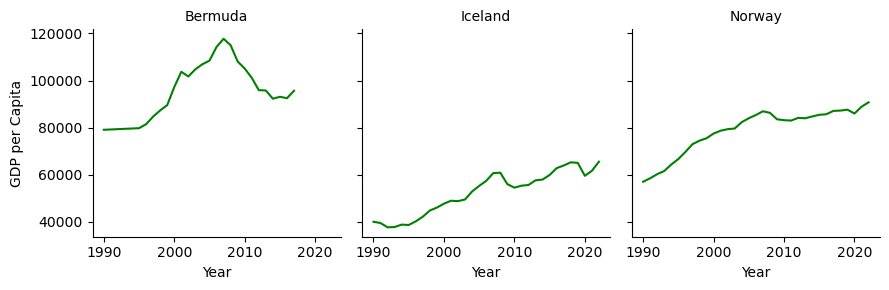

In [116]:
g = sns.FacetGrid(all_years_three_highest, col="Country")
g.map(sns.lineplot, "Year", "GDP_Per_Capita", color="green")
g.set_axis_labels("Year", "GDP per Capita")
g.set_titles("{col_name}")
plt.show()

22. Subset `gdp_and_internet_use` to just the year 2014. Save this as a new dataframe named `gdp_and_internet_use_2014`.
    

In [121]:
gdp_and_internet_use_2014 = gdp_and_internet_use[gdp_and_internet_use['Year'] == 2014]

23. Create a plot which compares Internet Users Percentage and GDP per Capita for the year 2014. What do you notice from this plot? If you see any unusual points, investigate them.

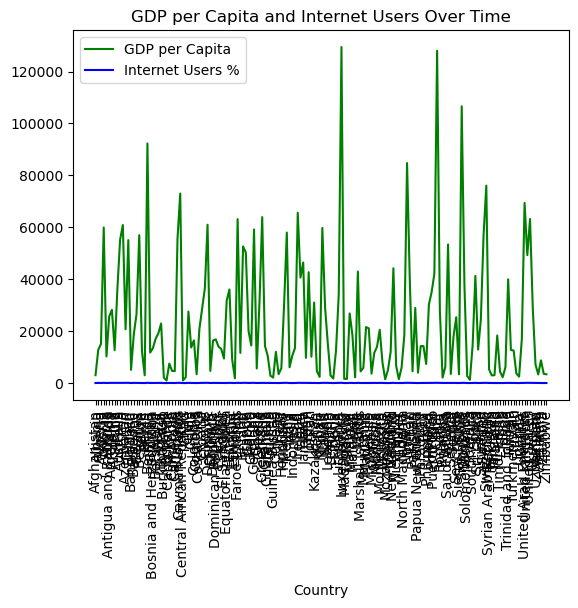

In [138]:
plt.plot(gdp_and_internet_use_2014['Country'], gdp_and_internet_use_2014['GDP_Per_Capita'], label='GDP per Capita', color='green')
plt.plot(gdp_and_internet_use_2014['Country'], gdp_and_internet_use_2014['Internet_Users_Pct'], label='Internet Users %', color='blue')
plt.xlabel('Country')
plt.title('GDP per Capita and Internet Users Over Time')
plt.legend()
plt.xticks(rotation=90)
plt.show()

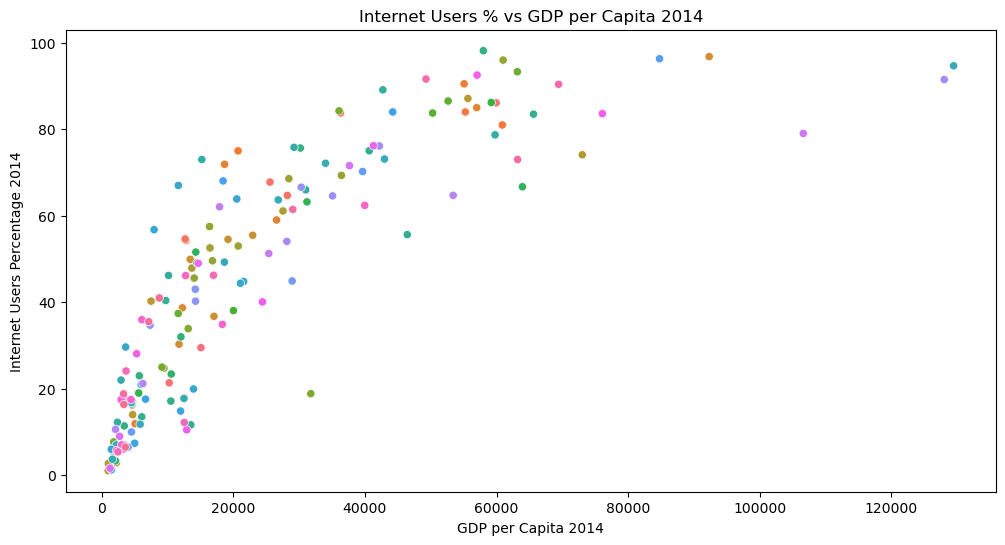

In [142]:
gdp_and_internet_use_2014 = gdp_and_internet_use[gdp_and_internet_use['Year'] == 2014]
plt.figure(figsize=(12, 6))
sns.scatterplot(x='GDP_Per_Capita', y='Internet_Users_Pct', data=gdp_and_internet_use_2014, hue='Country', legend=False)
plt.xlabel('GDP per Capita 2014')
plt.ylabel('Internet Users Percentage 2014')
plt.title('Internet Users % vs GDP per Capita 2014')
plt.show()

24. **Stretch Question:** Use the `qcut` function from pandas (https://pandas.pydata.org/docs/reference/api/pandas.qcut.html) to divide countries in `gdp_per_capita_2014` into three groups based on their GDP per capita values. Label these groups as "Low", "Medium", and "High". Put these labels in a new column, named "GDP_group".

In [165]:
gdp_and_internet_use_2014.loc[:,'GDP_group'] = pd.qcut(gdp_and_internet_use_2014['GDP_Per_Capita'], q=3, labels=['Low','Medium','High'])
gdp_and_internet_use_2014

,Country,Year,GDP_Per_Capita,Internet_Users_Pct,GDP_group
5,Afghanistan,2014,3017.942544,7.0000,Low
27,Albania,2014,12788.747231,54.3000,Medium
56,Algeria,2014,15073.762940,29.5000,Medium
85,Andorra,2014,59929.244467,86.1000,High
112,Angola,2014,10250.592404,21.3623,Medium
...,...,...,...,...,...
4666,Uzbekistan,2014,7145.109807,35.5000,Low
4695,Vanuatu,2014,3320.379187,18.8000,Low
4723,Viet Nam,2014,8751.882806,41.0000,Medium
4751,Zambia,2014,3585.577485,6.5000,Low


25. **Stretch Question:** How does the median internet users percentage compare for the three gdp groups?

In [171]:
median_internet_use_2014_by_gdp_group = gdp_and_internet_use_2014.groupby('GDP_group',observed=True)['Internet_Users_Pct'].median()

In [173]:
median_internet_use_2014_by_gdp_group

GDP_group
Low       11.4000
Medium    45.5904
High      76.1603
Name: Internet_Users_Pct, dtype: float64

### Bonus exercise:
1.    Download another data set from the UN data (http://data.un.org/Explorer.aspx) to merge with your data and explore.